In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
# import quad from scipy
from scipy.integrate import quad
from scipy.optimize import fsolve

# IFT in  Practice: 1D case

### Given $$ Q(x) = \exp\biggl[-\frac{(x - x_{0})^{2}}{2\sigma^{2}} - bx^{4}\biggr] $$ $$P(x) = \frac{Q(x)}{Z} = \frac{e^{-H(x)}}{\int_{-\infty}^{\infty}e^{-H(x)}dx}$$

## Finding the Hamiltonian 

### We have that the Hamiltonian is given by: $$H(x) = -\log(Q(x)) = \frac{(x - x_{0})^{2}}{2\sigma^{2}} + bx^{4} = \frac{x^2 - 2xx_{0} + x_{0}^{2}}{2\sigma^{2}} + bx^{4}$$

### Taking the Taylor Expansion of the Hamiltonian is: $$H(x) = H(0) + H'(0) + H''(0) + \sum_{n=3}^{\infty} \frac{1}{n!}H^{(n)}(0)$$

### Where $$H(0) = \frac{x_{0}^{2}}{2\sigma^{2}}$$ $$H'(0) = -\frac{x_{0}}{\sigma^{2}}$$ $$H''(0) = \frac{1}{\sigma^{2}}$$ $$H^{(4)}(0) = 4!b$$ $$H^{(n) \geq 5} = H^{(n) = 3} = 0$$

### So we get $$H(x) = \frac{x_{0}^{2}}{2\sigma^{2}} -\frac{x_{0}}{\sigma^{2}}x + \frac{1}{\sigma^{2}}\frac{x^{2}}{2!} + bx^{4}$$

In [2]:
def Hamiltonian(x:float, a: float , sigma: float, b: float) -> float:
    H0 = (0.5 * a**2) / sigma**2
    H1 =  -((a) * x) / (sigma**2)
    H2 = (x**2) / (2 * sigma**2) 
    H4 = b * (x**4)

    return H0 + H1 + H2 + H4

def HamiltonianPrime(x:float, a: float, sigma: float, b: float) -> float:
    H1 =  - a/ (sigma**2)
    H2 = x / (sigma**2) 
    H4 = 4 * b * (x**3)
    return H1 + H2 + H4

def HamiltonianPrime2(x:float, a: float, sigma: float, b: float) -> float:
    return 12*b*x**2 + (1/sigma**2)

def MAP(xguess: float, sigma: float, b: float, a:float) -> float:
    map = fsolve(HamiltonianPrime, x0 = xguess, args=(a, sigma, b))
    return map 

def Q(x:float, x0: float, sigma: float, b: float) -> float:
    H = Hamiltonian(x, x0, sigma, b)
    return np.exp(-H)

In [3]:
a = 1
b = 0.01
sig = 0.5
map = MAP(1.2,sig,b,a)

In [4]:
H0map = Hamiltonian(map,a,sig,b)
j = HamiltonianPrime(map,a,sig,b)   
Dinv = HamiltonianPrime2(map,a,sig,b)
D = Dinv**-1
lambda3 = 24*b*map
lambda4 = 24*b
circ = 0.5*np.log(2*math.pi*D)


In [5]:
Log_Zift = -H0map + circ + (1/8)*(D**2)*lambda4 + (1/8)*(D**3)*(lambda3**2) + (1/12)*(D**3)*(lambda3**2) + (1/96)*(D**4)*(lambda4**2) + (1/48)*(D**4)*(lambda4**2) 
Zift = np.exp(Log_Zift)
print(Zift)

[1.2256017]


In [6]:
Zquad, err = quad(Q, -np.inf, np.inf, args=(a, sig, b))
print(f'Z quad: {Zquad}')

Z quad: 1.2212778921005218


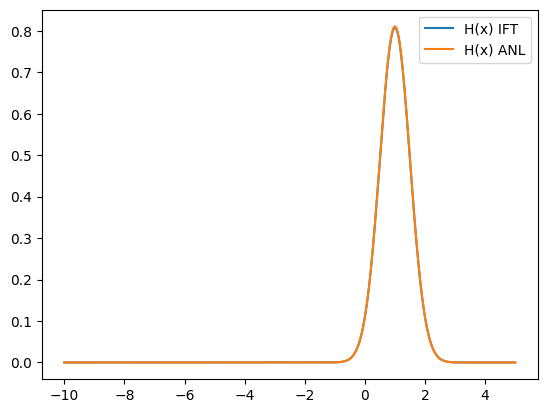

In [7]:
x = np.linspace(-10, 5, 1000)
Q = [np.exp(-Hamiltonian(a, xi, sig, b)) for xi in x]
P2 = [q / Zift for q in Q]
P3 = [q / Zquad for q in Q]
plt.plot(x, P2, label='H(x) IFT')
plt.plot(x, P3, label='H(x) ANL')
# plt.plot(x, P3, label='H(x) Quad')
plt.legend()
plt.show()